In [56]:
# Data Web Scraping
# Importing the libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
from urllib.request import urlopen
from re import findall
import webbrowser
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [ ]:
webbrowser.open("https://www.car.org/en/marketdata/data/haitraditional")
webbrowser.open("https://www.cdc.gov/nchs/covid19/pulse/reduced-access-to-care.htm", "https://www.huduser.gov/portal/home.html")
webbrowser.open("https://www.census.gov/data/experimental-data-products/household-pulse-survey.html")
webbrowser.open("https://www.nlc.org/wp-content/uploads/2021/02/UnlockingHomelessnessReportPart1.pdf")
webbrowser.open("https://www.usich.gov/tools-for-action/map/#fn[]=1400&fn[]=2800&fn[]=6200&fn[]=10000&fn[]=13200")
webbrowser.open("https://www.huduser.gov/portal/datasets/ahar/2020-ahar-part-1-pit-estimates-of-homelessness-in-the-us.html")
webbrowser.open("https://www.hud.gov/sites/dfiles/CPD/documents/FY-2021_CoC-Names-Numbers_Final.pdf")
webbrowser.open("https://data.bls.gov/timeseries/LASST060000000000006?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true")
webbrowser.open(":Housing Affordability Advances in January 2021 as Incomes Rise (nar.realtor)")
webbrowser.open("American Housing Survey: Housing Affordability Data System | HUD USER")
                

In [4]:
#Load the Website
url= requests.get("https://www.car.org/en/marketdata/data/haitraditional/", headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})

# Storing the content (HTML code) of website
c= url.content

In [7]:
# Create BeautifulSoup object

soup= BeautifulSoup(c,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=10, user-scalable=yes" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="always" name="referrer"/>
  <link href="/manifest.json" rel="manifest"/>
  <title>
   Housing Affordability Index - Traditional
  </title>
  <meta content="Housing,Data,2010,2011,Housing Opportunity,Market Analysis,Market Stats" name="keywords">
   <meta content="C.A.R.’s index tracking historical affordability trends throughout California under traditional assumptions" name="description"/>
   <meta content="index, follow" name="robots"/>
   <meta content="https://www.car.org/en/marketdata/data/haitraditional/" property="og:url"/>
   <meta content="Housing Affordability Index - Tradi

In [8]:
# Extracting all the div elements containing property data 
all= soup.find_all("a",{"class":"subLink"})
all

[<a class="subLink" href="/en/marketdata/data/countysalesactivity">
 Current Sales &amp; Price Statistics
 </a>, <a class="subLink" href="/en/marketdata/data/haitraditional">
 Housing Affordability Index - Traditional
 </a>, <a class="subLink" href="/en/marketdata/data/housingdata">
 Historical Housing Data
 </a>, <a class="subLink" href="/en/marketdata/interactive/buyersguide">
 Buyer's Guide
 </a>, <a class="subLink" href="/en/marketdata/interactive/housingmarketoverview">
 Housing Market Overview
 </a>, <a class="subLink" href="/en/marketdata/interactive/marketupdatevideos">
 Market Update Videos
 </a>, <a class="subLink" href="/en/marketdata/interactive/View-All-Shareable-Reports">
 All Shareable Reports
 </a>, <a class="subLink" href="/en/marketdata/interactive/View-All-Interactive-Dashboards">
 All Interactive Dashboards
 </a>, <a class="subLink" href="/en/advocacy/PACSnRAF/raf">
 REALTOR® Action Fund
 </a>]

In [9]:
 for tag in soup.findAll('a'):
        print (tag.contents)

['\n', <h6>Housing Market Forecast</h6>, '\n']
['\n', <h6>Data &amp; Statistics</h6>, '\n']
['\nCurrent Sales & Price Statistics\n']
['\nHousing Affordability Index - Traditional\n']
['\nHistorical Housing Data\n']
['\n', <h6>Housing Matters Podcast</h6>, '\n']
['\n', <h6>Market Minute</h6>, '\n']
['\n', <h6>Shareable and Interactive Reports</h6>, '\n']
["\nBuyer's Guide\n"]
['\nHousing Market Overview\n']
['\nMarket Update Videos\n']
['\nAll Shareable Reports\n']
['\nAll Interactive Dashboards\n']
['\n', <h6>Speeches &amp; Presentations</h6>, '\n']
['\n', <h6>Surveys &amp; Reports</h6>, '\n']
['\n', <h6>Stay Connected</h6>, '\n']
['\n', <h6>Model MLS Rules/Materials</h6>, '\n']
['\n', <h6>Code of Ethics Violators</h6>, '\n']
['\n', <h6>Statewide MLS Initiative</h6>, '\n']
['\n', <h6>NAR Code of Ethics</h6>, '\n']
['\n', <h6>Online Training for Professional Standards Volunteers</h6>, '\n']
['\n', <h6>Professional Standards Materials</h6>, '\n']
['\n', <h6>CAR Interboard Arbitration</h6

In [11]:
all[2].text.replace("\n","").replace(" ","")


'HistoricalHousingData'

In [12]:
#Dataset(csv file loading)
project = pd.read_csv('dataset_interpolate.csv')
project.head()

,Unnamed: 0,Year,Period,Week,Overall Number of Homeless,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,Poverty Rate (CA),Poverty Threshold (single),Poverty Threshold (2 People),SNAP Beneficiaries,House Affordability Index (HAI),California Median Weekly Wages,Median House Prices
0,0,2011,Jan,1,129738.8333,63.8,55.9,1836380.5,1611338.6,225041.9,12.3,0.162333,11267.66667,14400.33333,3602170.0,0.530000,1066.000000,279220.0
1,1,2011,Feb,2,129319.6667,63.7,55.9,1835912.1,1612779.6,223132.5,12.2,0.162667,11287.33333,14423.66667,3619055.0,0.523333,1049.333333,271370.0
2,2,2011,Mar,3,128900.5000,63.6,55.9,1835466.9,1613980.5,221486.4,12.1,0.163000,11307.00000,14447.00000,3669962.0,0.516667,1032.666667,286550.0
3,3,2011,Apr,4,128481.3333,63.6,55.9,1835242.8,1614758.5,220484.3,12.0,0.163333,11326.66667,14470.33333,3679671.0,0.510000,1016.000000,294140.0
4,4,2011,May,5,128062.1667,63.5,55.9,1835863.9,1615506.7,220357.2,12.0,0.163667,11346.33333,14493.66667,3727005.0,0.513333,1027.000000,292850.0


In [13]:
#Data Cleaning
p=project.replace(np.nan,0)
p

,Unnamed: 0,Year,Period,Week,Overall Number of Homeless,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,Poverty Rate (CA),Poverty Threshold (single),Poverty Threshold (2 People),SNAP Beneficiaries,House Affordability Index (HAI),California Median Weekly Wages,Median House Prices
0,0,2011,Jan,1,129738.8333,63.8,55.9,1836380.5,1611338.6,225041.9,12.3,0.162333,11267.66667,14400.33333,3602170.00,0.530000,1066.000000,279220.0
1,1,2011,Feb,2,129319.6667,63.7,55.9,1835912.1,1612779.6,223132.5,12.2,0.162667,11287.33333,14423.66667,3619055.00,0.523333,1049.333333,271370.0
2,2,2011,Mar,3,128900.5000,63.6,55.9,1835466.9,1613980.5,221486.4,12.1,0.163000,11307.00000,14447.00000,3669962.00,0.516667,1032.666667,286550.0
3,3,2011,Apr,4,128481.3333,63.6,55.9,1835242.8,1614758.5,220484.3,12.0,0.163333,11326.66667,14470.33333,3679671.00,0.510000,1016.000000,294140.0
4,4,2011,May,5,128062.1667,63.5,55.9,1835863.9,1615506.7,220357.2,12.0,0.163667,11346.33333,14493.66667,3727005.00,0.513333,1027.000000,292850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,2020,Oct,118,159836.3333,60.8,54.8,1890463.8,1705026.0,185437.8,9.8,0.118000,12951.00000,16493.08333,4690479.75,0.270000,1466.000000,711300.0
118,118,2020,Nov,119,160692.1667,59.8,54.6,1860462.6,1698390.3,162072.3,8.7,0.118000,12945.00000,16490.29167,4893360.00,0.280000,1466.000000,698980.0
119,119,2020,Dec,120,161548.0000,60.2,54.5,1870547.5,1695701.9,174845.6,9.3,0.118000,12939.00000,16487.50000,4893360.00,0.290000,1466.000000,717930.0
120,120,2021,Jan,121,161548.0000,6.0,54.6,1866852.3,1698868.3,167984.0,9.0,0.118000,12909.50000,16953.75000,4893360.00,0.300000,1466.000000,699920.0


In [16]:
#Statistical Inference
p.shape
p.describe()

,Unnamed: 0,Year,Week,Overall Number of Homeless,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,Poverty Rate (CA),Poverty Threshold (single),Poverty Threshold (2 People),SNAP Beneficiaries,House Affordability Index (HAI),California Median Weekly Wages,Median House Prices
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02,1.220000e+02,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02,122.000000,122.000000,122.000000
mean,60.500000,2015.590164,61.500000,127719.106557,61.867213,57.673770,1.885785e+06,1.746270e+06,139515.663115,7.445902,0.147623,12203.516393,15551.278689,4.125456e+06,0.348607,1227.311475,482957.860741
std,35.362409,2.945101,35.362409,13453.989086,5.166971,1.981268,3.349601e+04,8.484663e+04,53869.398535,2.987277,0.019110,515.327735,660.128557,2.998557e+05,0.087260,137.920119,117252.642279
min,0.000000,2011.000000,1.000000,113952.000000,6.000000,50.000000,1.835243e+06,1.552932e+06,78530.400000,4.100000,0.118000,11267.666670,14400.333330,3.602170e+06,0.260000,1016.000000,268810.000000
25%,30.250000,2013.000000,31.250000,117591.083325,62.200000,56.525000,1.856308e+06,1.677480e+06,90291.475000,4.700000,0.129771,11821.500000,15060.854165,3.880122e+06,0.296667,1112.750000,418785.000000
50%,60.500000,2016.000000,61.500000,123586.250000,62.300000,58.150000,1.881472e+06,1.755307e+06,125736.750000,6.650000,0.151750,12100.250000,15413.250000,4.121970e+06,0.310000,1208.500000,490275.000000
75%,90.750000,2018.000000,91.750000,130979.500000,62.700000,59.300000,1.918791e+06,1.830225e+06,181012.275000,9.775000,0.165917,12679.166665,16115.958335,4.352970e+06,0.342500,1323.416667,565637.500000
max,121.000000,2021.000000,122.000000,161548.000000,63.800000,59.900000,1.943712e+06,1.862968e+06,296643.500000,16.000000,0.170000,13011.000000,17420.000000,4.893360e+06,0.560000,1469.000000,717930.000000


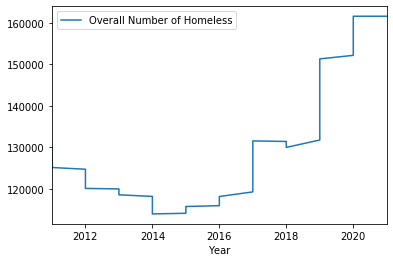

In [71]:
import matplotlib.pyplot as plt
from datetime import datetime
p.plot(x='Year', y='Overall Number of Homeless');

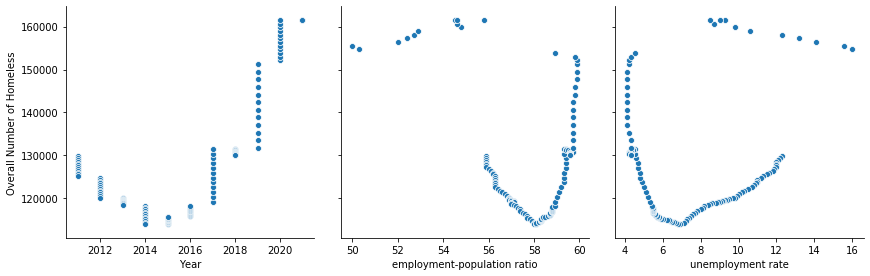

In [17]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(project, x_vars=['Year', 'employment-population ratio','unemployment rate'], 
             y_vars='Overall Number of Homeless', height=4, aspect=1, kind='scatter')
plt.show()

In [30]:
#Data variable relationship
house_data_nadrop = p.select_dtypes(exclude=['object'])

#Select Overall Number of Homeless into target variable
target = house_data_nadrop['Overall Number of Homeless']

#Drop Year, Week as we do not need it for modelling purpose
#features = features.drop(['Year','Week'], axis = 1)

#drop Overall Number of Homeless from rest of the data to features
features = house_data_nadrop.drop('Overall Number of Homeless', axis = 1)


In [31]:
#Split the data into train and validation(using full dataset)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [32]:
from sklearn.ensemble import RandomForestRegressor

#create the model
regressor_model = RandomForestRegressor(random_state=0)

#fit the model
regressor_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor_model.predict(X_test)

C:\Users\mou_1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
r2_score(y_test, y_pred)

0.9944245960031943

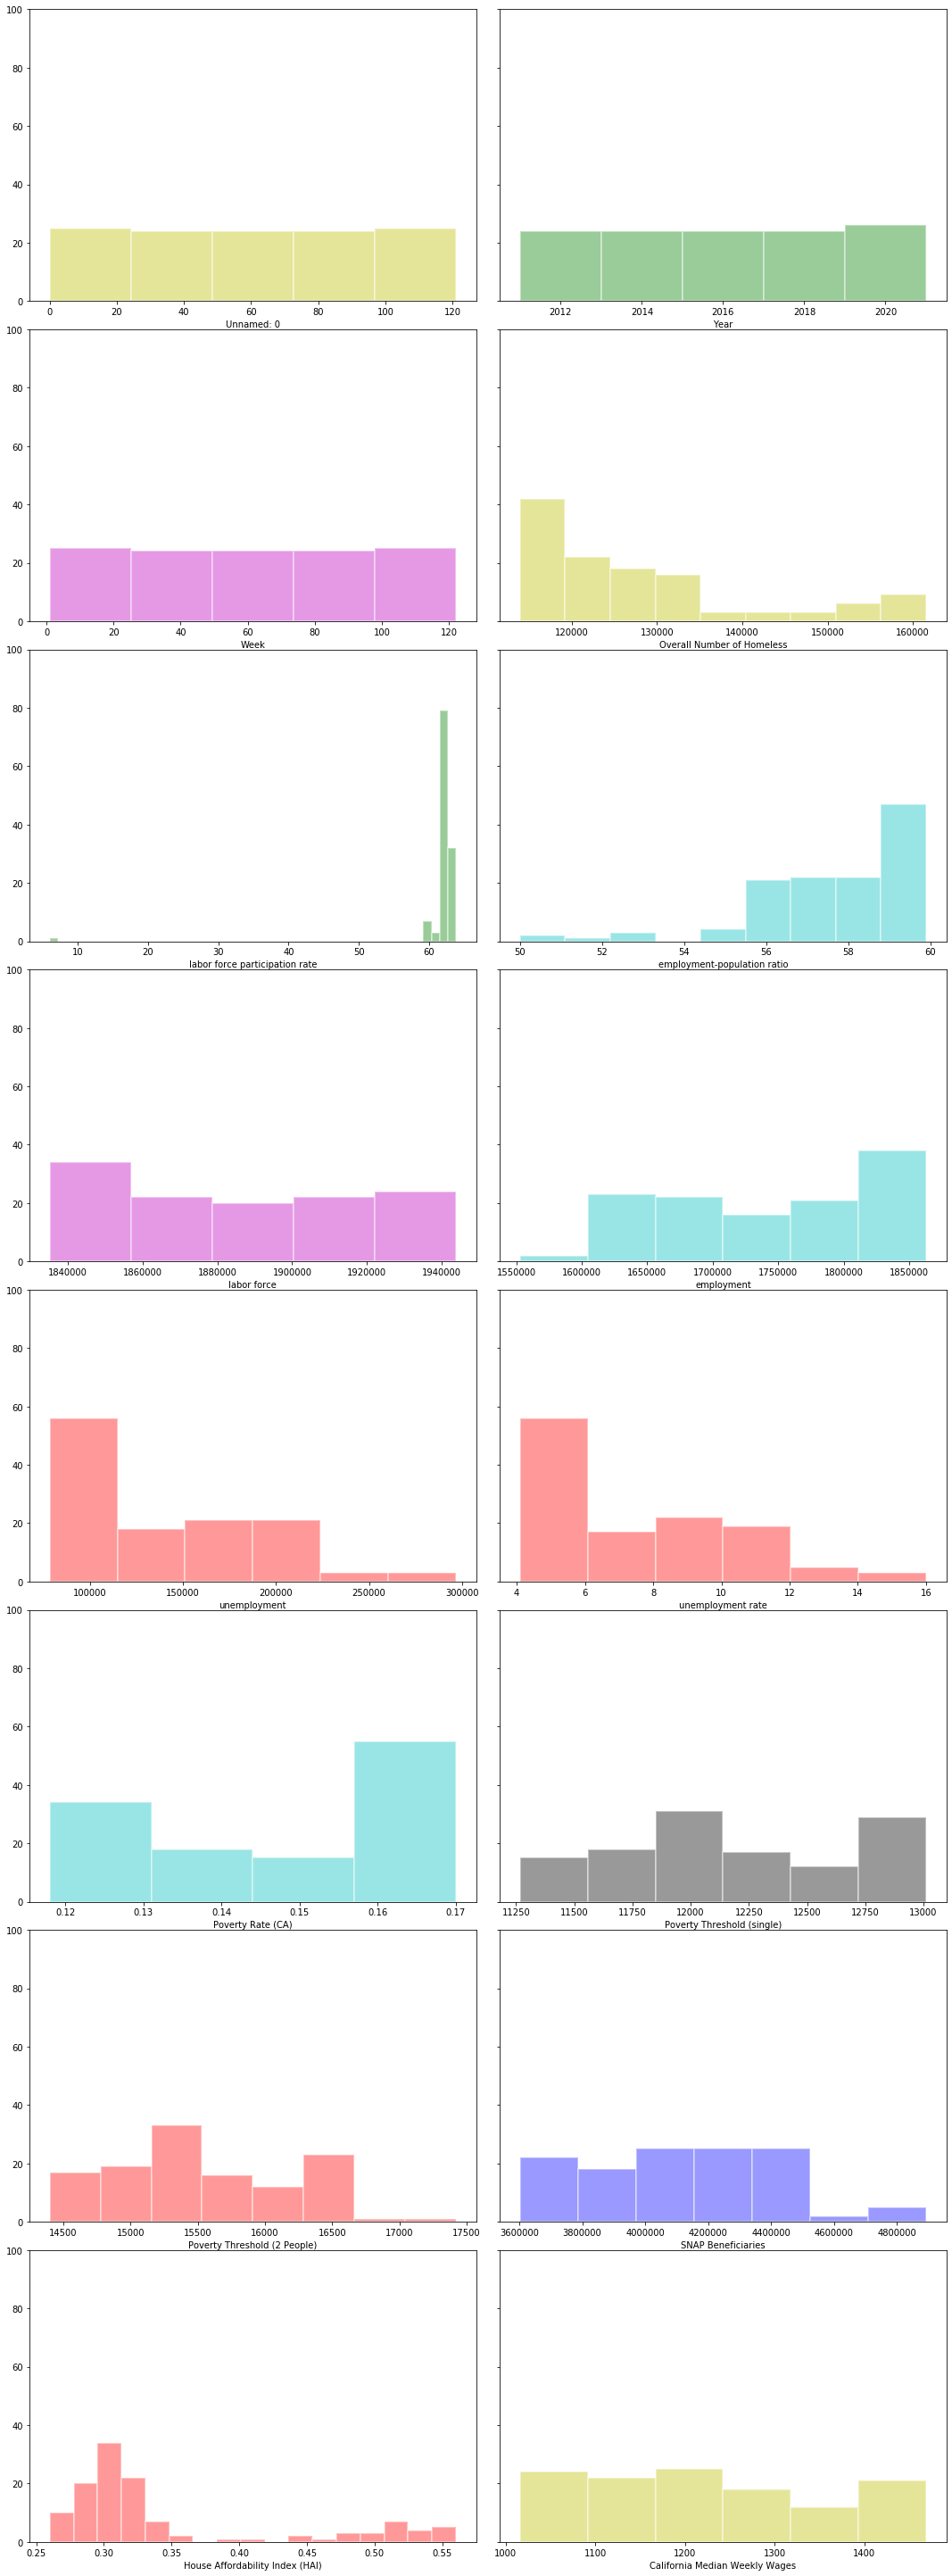

In [34]:
import seaborn as sns
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =8,ncols=2, sharey=True,figsize = (15,40))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(house_data_nadrop.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(house_data_nadrop[house_data_nadrop.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,100)

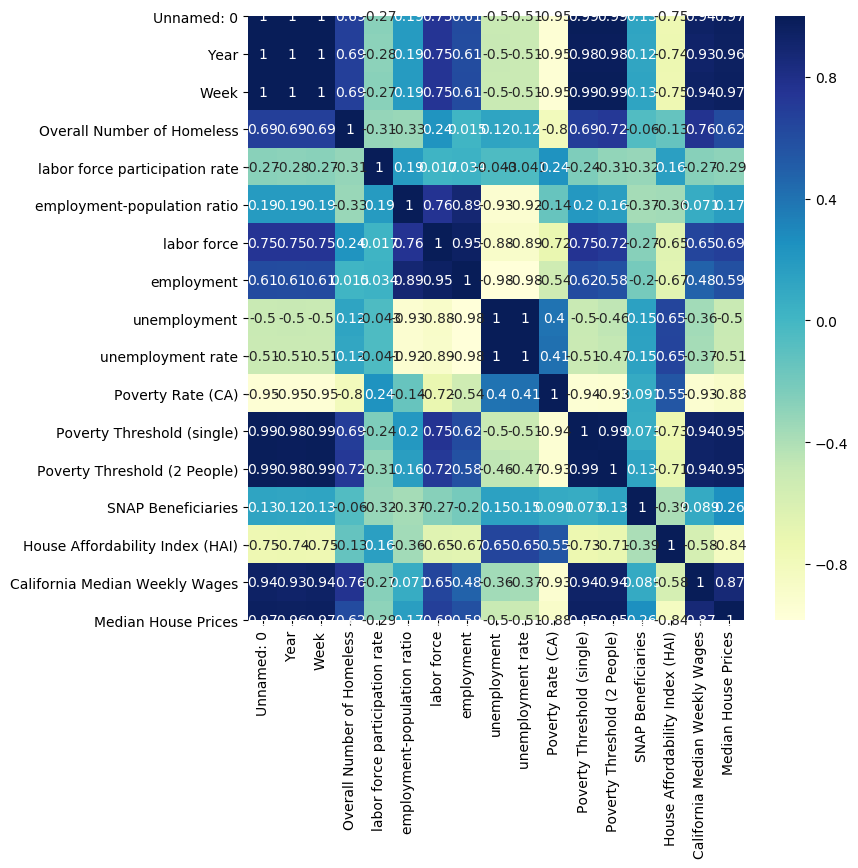

In [35]:
plt.figure(figsize= (8,8), dpi=100)
sns.heatmap(house_data_nadrop.corr(),cmap="YlGnBu", annot = True)

In [36]:
target = house_data_nadrop['Overall Number of Homeless']

#drop California Median weekly Wages, Employment population ratio and store rest of the data to features
features = house_data_nadrop[['Year','Week', 'labor force', 'employment', 'unemployment', 'Poverty Threshold (2 People)', 'SNAP Beneficiaries', 'Median House Prices']].copy()

features

,Year,Week,labor force,employment,unemployment,Poverty Threshold (2 People),SNAP Beneficiaries,Median House Prices
0,2011,1,1836380.5,1611338.6,225041.9,14400.33333,3602170.00,279220.0
1,2011,2,1835912.1,1612779.6,223132.5,14423.66667,3619055.00,271370.0
2,2011,3,1835466.9,1613980.5,221486.4,14447.00000,3669962.00,286550.0
3,2011,4,1835242.8,1614758.5,220484.3,14470.33333,3679671.00,294140.0
4,2011,5,1835863.9,1615506.7,220357.2,14493.66667,3727005.00,292850.0
...,...,...,...,...,...,...,...,...
117,2020,118,1890463.8,1705026.0,185437.8,16493.08333,4690479.75,711300.0
118,2020,119,1860462.6,1698390.3,162072.3,16490.29167,4893360.00,698980.0
119,2020,120,1870547.5,1695701.9,174845.6,16487.50000,4893360.00,717930.0
120,2021,121,1866852.3,1698868.3,167984.0,16953.75000,4893360.00,699920.0


In [38]:
#Split the data into train and validation

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
#create the model
regressor_model = RandomForestRegressor(random_state=0)

#fit the model
regressor_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor_model.predict(X_test)
r2_score(y_test, y_pred)

C:\Users\mou_1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9911692102580577

In [39]:
#Load the Test data and have a look at the sample
test_data = pd.read_excel('Homeless_test.csv')
test_data.head()


,Unnamed: 0,Year,Period,Week,Overall Number of Homeless,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,Poverty Rate (CA),Poverty Threshold (single),Poverty Threshold (2 People),SNAP Beneficiaries,House Affordability Index (HAI),California Median Weekly Wages,Median House Prices
0,110,2020,Mar,111,153845.5000,61.7,58.9,1916866.5,1830457.4,86409.1,4.5,0.118,12993.0,16512.62500,4100000.0,0.336667,1465.333333,612440
1,111,2020,Apr,112,154701.3333,59.8,50.3,1859086.4,1562442.9,296643.5,16.0,0.118,12987.0,16509.83333,4300000.0,0.330000,1469.000000,606410
2,112,2020,May,113,155557.1667,59.2,50.0,1839252.8,1552931.9,286320.9,15.6,0.118,12981.0,16507.04167,4550000.0,0.313333,1468.000000,588070
3,113,2020,Jun,114,156413.0000,60.5,52.0,1881314.2,1616103.6,265210.6,14.1,0.118,12975.0,16504.25000,4800000.0,0.296667,1467.000000,626170
4,114,2020,Jul,115,157268.8333,60.3,52.4,1873153.9,1626804.5,246349.4,13.2,0.118,12969.0,16501.45833,4081839.0,0.280000,1466.000000,666320


In [40]:
#Drop NA values
test_data_nadrop = test_data.dropna(axis=1)
test_data_nadrop.head()

,Unnamed: 0,Year,Period,Week,Overall Number of Homeless,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,Poverty Rate (CA),Poverty Threshold (single),Poverty Threshold (2 People),SNAP Beneficiaries,House Affordability Index (HAI),California Median Weekly Wages,Median House Prices
0,110,2020,Mar,111,153845.5000,61.7,58.9,1916866.5,1830457.4,86409.1,4.5,0.118,12993.0,16512.62500,4100000.0,0.336667,1465.333333,612440
1,111,2020,Apr,112,154701.3333,59.8,50.3,1859086.4,1562442.9,296643.5,16.0,0.118,12987.0,16509.83333,4300000.0,0.330000,1469.000000,606410
2,112,2020,May,113,155557.1667,59.2,50.0,1839252.8,1552931.9,286320.9,15.6,0.118,12981.0,16507.04167,4550000.0,0.313333,1468.000000,588070
3,113,2020,Jun,114,156413.0000,60.5,52.0,1881314.2,1616103.6,265210.6,14.1,0.118,12975.0,16504.25000,4800000.0,0.296667,1467.000000,626170
4,114,2020,Jul,115,157268.8333,60.3,52.4,1873153.9,1626804.5,246349.4,13.2,0.118,12969.0,16501.45833,4081839.0,0.280000,1466.000000,666320


In [41]:
test_data_nadrop.columns

Index(['Unnamed: 0', 'Year', 'Period', 'Week', 'Overall Number of Homeless',
       'labor force participation rate', 'employment-population ratio',
       'labor force', 'employment', 'unemployment', 'unemployment rate',
       'Poverty Rate (CA)', 'Poverty Threshold (single)',
       'Poverty Threshold (2 People)', 'SNAP Beneficiaries',
       'House Affordability Index (HAI)', 'California Median Weekly Wages',
       'Median House Prices'],
      dtype='object')

In [42]:
features = test_data_nadrop[['Year','Week', 'labor force', 'employment', 'unemployment', 'Poverty Threshold (2 People)', 'SNAP Beneficiaries', 'Median House Prices']].copy()

features

,Year,Week,labor force,employment,unemployment,Poverty Threshold (2 People),SNAP Beneficiaries,Median House Prices
0,2020,111,1916866.5,1830457.4,86409.1,16512.62500,4100000.00,612440
1,2020,112,1859086.4,1562442.9,296643.5,16509.83333,4300000.00,606410
2,2020,113,1839252.8,1552931.9,286320.9,16507.04167,4550000.00,588070
3,2020,114,1881314.2,1616103.6,265210.6,16504.25000,4800000.00,626170
4,2020,115,1873153.9,1626804.5,246349.4,16501.45833,4081839.00,666320
5,2020,116,1866666.3,1636534.3,230132.0,16498.66667,4284719.25,706900
6,2020,117,1838555.8,1643550.3,195005.5,16495.87500,4487599.50,712430
7,2020,118,1890463.8,1705026.0,185437.8,16493.08333,4690479.75,711300
8,2020,119,1860462.6,1698390.3,162072.3,16490.29167,4893360.00,698980
9,2020,120,1870547.5,1695701.9,174845.6,16487.50000,4893360.00,717930


In [43]:
test_pred = regressor_model.predict(features)
test_pred

array([152589.88333, 156156.25002, 156327.41669, 156498.58333,
       157439.99998, 158894.91668, 159494.     , 160007.49997,
       160777.75003, 161205.66667, 160948.91667, 160948.91667])

In [52]:
columns = ['Year', 'Overall Number of Homeless']
dataframe = pd.DataFrame(columns=columns)
dataframe["Year"] = test_data_nadrop["Year"]
dataframe["Overall Number of Homeless"] = test_pred
dataframe.head()

,Year,Overall Number of Homeless
0,2020,152589.88333
1,2020,156156.25002
2,2020,156327.41669
3,2020,156498.58333
4,2020,157439.99998


In [48]:
##Load the Train data(Before Pandemic) and have a look at the sample
train_data = pd.read_csv('Homeless_train.csv')
train_data.head()

,Unnamed: 0,Year,Period,Week,Overall Number of Homeless,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,Poverty Rate (CA),Poverty Threshold (single),Poverty Threshold (2 People),SNAP Beneficiaries,House Affordability Index (HAI),California Median Weekly Wages,Median House Prices
0,0,2011,Jan,1,129738.8333,63.8,55.9,1836380.5,1611338.6,225041.9,12.3,0.162333,11267.66667,14400.33333,3602170.0,0.530000,1066.000000,279220.0
1,1,2011,Feb,2,129319.6667,63.7,55.9,1835912.1,1612779.6,223132.5,12.2,0.162667,11287.33333,14423.66667,3619055.0,0.523333,1049.333333,271370.0
2,2,2011,Mar,3,128900.5000,63.6,55.9,1835466.9,1613980.5,221486.4,12.1,0.163000,11307.00000,14447.00000,3669962.0,0.516667,1032.666667,286550.0
3,3,2011,Apr,4,128481.3333,63.6,55.9,1835242.8,1614758.5,220484.3,12.0,0.163333,11326.66667,14470.33333,3679671.0,0.510000,1016.000000,294140.0
4,4,2011,May,5,128062.1667,63.5,55.9,1835863.9,1615506.7,220357.2,12.0,0.163667,11346.33333,14493.66667,3727005.0,0.513333,1027.000000,292850.0


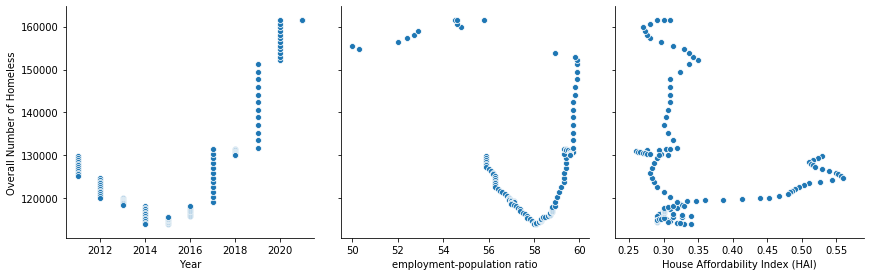

In [53]:
sns.pairplot(project, x_vars=['Year', 'employment-population ratio','House Affordability Index (HAI)'], 
             y_vars='Overall Number of Homeless', height=4, aspect=1, kind='scatter')
plt.show()

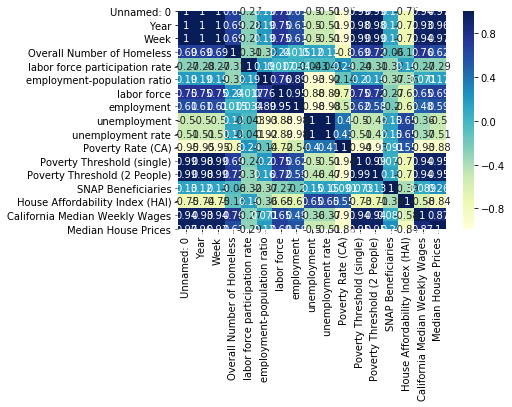

In [54]:
# Visualizing the data using heatmap
sns.heatmap(project.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [57]:
#Testing different models- Model-1
df = pd.read_csv('dataset_interpolate.csv')
x_variables = df.drop(['Year', 'Period', 'Week', 'labor force', 'employment', 'unemployment', 
                       'Poverty Threshold (2 People)'], axis=1)
y_variable = x_variables.pop('Overall Number of Homeless')
# adding a constant
x_variables = add_constant(x_variables)
x_variables
# Fit and summarize OLS model
sm.OLS(y_variable, x_variables).fit().summary()


model = sm.OLS(y_variable, x_variables).fit()
predictions = model.predict(x_variables) 

print_model = model.summary()
print(print_model)

                                OLS Regression Results                                
Dep. Variable:     Overall Number of Homeless   R-squared:                       0.960
Model:                                    OLS   Adj. R-squared:                  0.957
Method:                         Least Squares   F-statistic:                     269.5
Date:                        Mon, 19 Apr 2021   Prob (F-statistic):           5.67e-73
Time:                                23:36:46   Log-Likelihood:                -1135.4
No. Observations:                         122   AIC:                             2293.
Df Residuals:                             111   BIC:                             2324.
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\mou_1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
#Model-2
df = pd.read_csv('dataset_interpolate.csv')
x_variables = df.drop(['Year', 'Period', 'Week', 'labor force', 'employment', 'unemployment', 
                       'Poverty Threshold (2 People)'], axis=1)
y_variable = x_variables.pop('Overall Number of Homeless')

x_variables.drop(['labor force participation rate', 'SNAP Beneficiaries',
                  'House Affordability Index (HAI)'], axis=1, inplace=True)

# adding a constant
x_variables = add_constant(x_variables)
x_variables
# Fit and summarize OLS model
sm.OLS(y_variable, x_variables).fit().summary()


model = sm.OLS(y_variable, x_variables).fit()
predictions = model.predict(x_variables) 

print_model = model.summary()
print(print_model)

                                OLS Regression Results                                
Dep. Variable:     Overall Number of Homeless   R-squared:                       0.919
Model:                                    OLS   Adj. R-squared:                  0.914
Method:                         Least Squares   F-statistic:                     185.5
Date:                        Mon, 19 Apr 2021   Prob (F-statistic):           3.22e-59
Time:                                23:37:33   Log-Likelihood:                -1178.9
No. Observations:                         122   AIC:                             2374.
Df Residuals:                             114   BIC:                             2396.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [59]:
#After adjusting lamda value-constant-Model-3
for i in x_variables.columns:
    if i == 'const':
        continue
    col = i+'**2'
    x_variables[col]=x_variables[i].transform(lambda x:x**2)
    
sm.OLS(y_variable, x_variables).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Overall Number of Homeless   R-squared:                       0.984
Model:                                    OLS   Adj. R-squared:                  0.982
Method:                         Least Squares   F-statistic:                     551.5
Date:                        Mon, 19 Apr 2021   Prob (F-statistic):           1.29e-91
Time:                                23:38:51   Log-Likelihood:                -1081.0
No. Observations:                         122   AIC:                             2188.
Df Residuals:                             109   BIC:                             2224.
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              5187.2601   2389.839      2.171      0.032     450.677    9923.844
Unnamed: 0                        -1172.3021    158.982     -7.374      0.000   -1487.400    -857.204
employment-population ratio        -3.91e+04   1.49e+04     -2.620      0.010   -6.87e+04   -9519.197
unemployment rate                  5169.7046   1911.526      2.704      0.008    1381.122    8958.287
Poverty Rate (CA)                 -3.301e+05   1.38e+05     -2.399      0.018   -6.03e+05   -5.74e+04
Poverty Threshold (single)          204.9443     68.644      2.986      0.003      68.894     340.994
California Median Weekly Wages     -119.6964     52.058     -2.299      0.023    -222.874     -16.519
Median House Prices                   0.0236      0.039      0.606      0.546      -0.054       0.101
Unnamed: 0**2                         8.0359      1.237      6.495      0.000       5.584      10.488
employment-population ratio**2      350.2376    134.456      2.605      0.010      83.750     616.725
unemployment rate**2               -269.6102     93.632     -2.879      0.005    -455.186     -84.034
Poverty Rate (CA)**2              -1.006e+05    4.2e+04     -2.397      0.018   -1.84e+05   -1.74e+04
Poverty Threshold (single)**2        -0.0079      0.003     -2.773      0.007      -0.013      -0.002
California Median Weekly Wages**2     0.0523      0.022      2.420      0.017       0.009       0.095
Median House Prices**2            -5.533e-09   4.12e-08     -0.134      0.893   -8.72e-08    7.61e-08
==============================================================================
Omnibus:                       30.570   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.569
Skew:                          -1.020   Prob(JB):                     9.53e-15
Kurtosis:                       5.922   Cond. No.                     6.36e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""